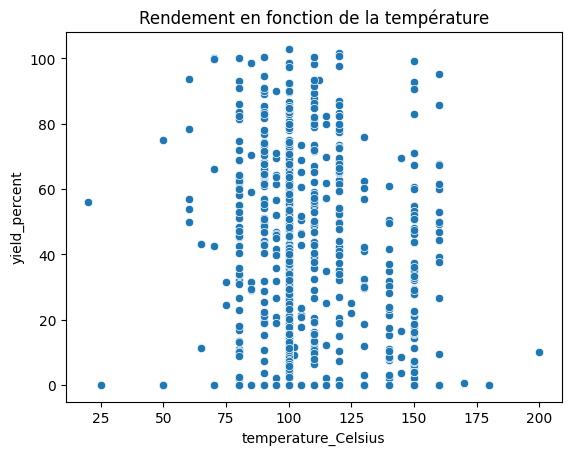

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("datas/buchwald_full_clean.csv")

sns.scatterplot(x="temperature_Celsius", y="yield_percent", data=df)
plt.title("Rendement en fonction de la température")
plt.show()

In [6]:
# 2. Extraction des variables
X = df[['temperature_Celsius']]
y = df['yield_percent']

# 3. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 4. Modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# 5. Prédictions et évaluation
y_pred = model.predict(X_test)
print(f"R² sur test : {r2_score(y_test, y_pred):.3f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE sur test : {rmse:.3f}")

R² sur test : 0.061
RMSE sur test : 29.403


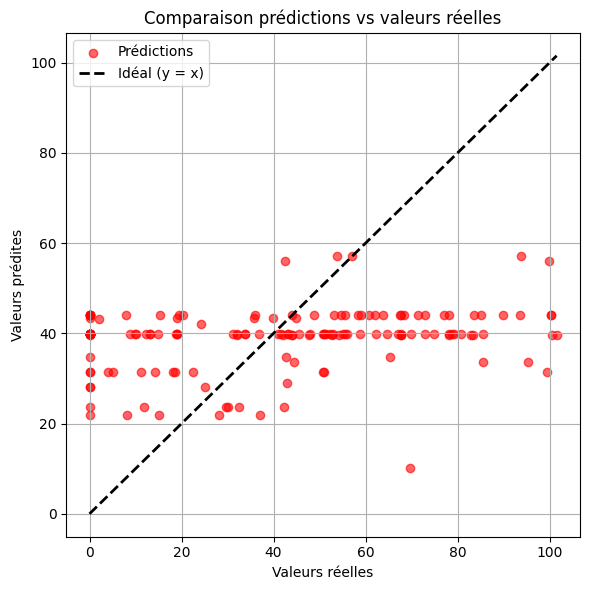

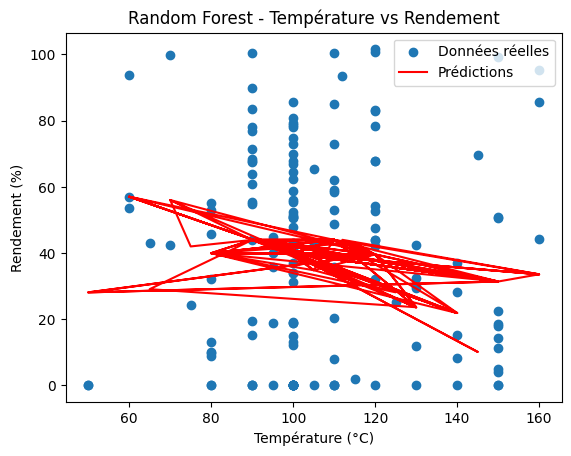

In [12]:
# 6. Visualisation des résultats
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Idéal (y = x)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison prédictions vs valeurs réelles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.scatter(X_test, y_test, label="Données réelles")
plt.plot(X_test, y_pred, color="red", label="Prédictions")
plt.xlabel("Température (°C)")
plt.ylabel("Rendement (%)")
plt.title("Random Forest - Température vs Rendement")
plt.legend()
plt.show()